# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import numpy as np
def polinomio(x, m):
  x = np.array(x)
  A = np.column_stack([x**k for k in range(0,m)])

  return A
def solucion(A, y):
  a = np.linalg.solve(A.T @ A, A.T @ y)
  return a

In [3]:
import matplotlib.pyplot as plt

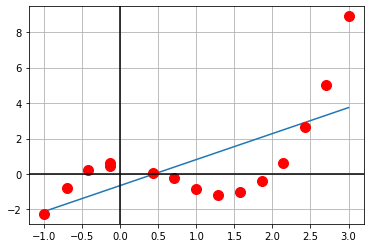

In [4]:
m = 1 

a = solucion(polinomio(x, m+1), y)
xs = np.linspace(-1,3,100)
ys = sum([a[k]*xs**k for k in range(0,m+1)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
plt.show()

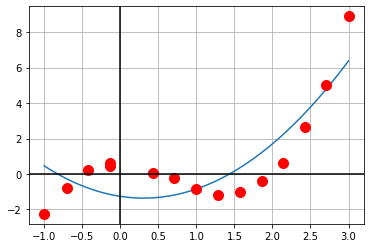

In [5]:
m = 2

a = solucion(polinomio(x, m+1), y)
xs = np.linspace(-1,3,100)
ys = sum([a[k]*xs**k for k in range(0,m+1)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
plt.show()

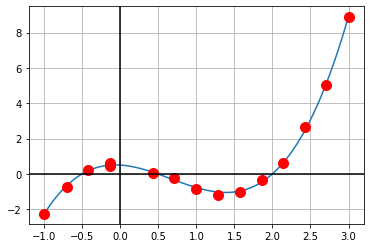

In [6]:
m = 3

a = solucion(polinomio(x, m+1), y)
xs = np.linspace(-1,3,100)
ys = sum([a[k]*xs**k for k in range(0,m+1)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
plt.show()

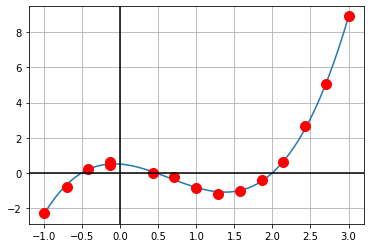

In [7]:
m = 4

a = solucion(polinomio(x, m+1), y)
xs = np.linspace(-1,3,100)
ys = sum([a[k]*xs**k for k in range(0,m+1)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

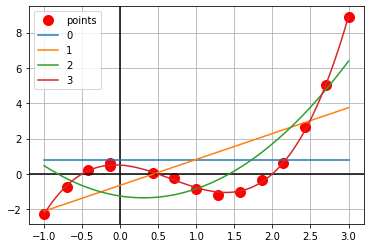

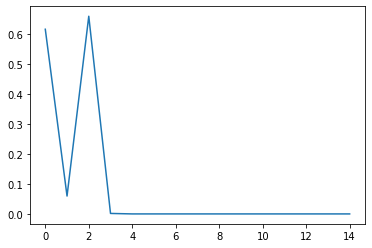

In [8]:
# ... ENTER YOUR CODE HERE ...
n = len(x)

plt.plot(x,y,'r.',ms=20, label='points')
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
xs = np.linspace(-1,3,100)

sigma = np.zeros(n)
for m in range(0,4):
  a = solucion(polinomio(x,m+1),y)
  ys = sum([a[k]*xs**k for k in range(0,m+1)])
  plt.plot(xs,ys,label=str(m))
  sigma[m] = 1/(n-m) * sum([ (sum([a[j]*x[k]**j for j in range(0,m+1)]) -y[k])**2 for k in range(0,m+1)]) 

plt.legend()
plt.show()

plt.plot(sigma)
plt.show()

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

In [9]:
# ... ENTER YOUR CODE HERE

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [10]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
def fact(A,b):
  m = A.shape[1]
  q, r = np.linalg.qr(A)
  f = (q.T @ b )[:m]
  return np.linalg.solve(r[:m], f)

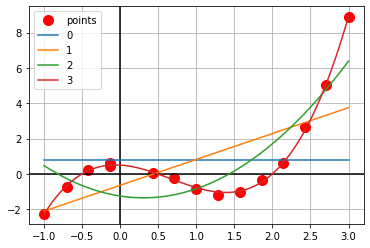

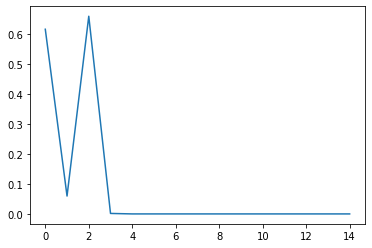

In [11]:
n = len(x)

plt.plot(x,y,'r.',ms=20, label='points')
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.grid(True, which='both')
xs = np.linspace(-1,3,100)

sigma = np.zeros(n)
for m in range(0,4):
  a = fact(polinomio(x,m+1),y)
  ys = sum([a[k]*xs**k for k in range(0,m+1)])
  plt.plot(xs,ys,label=str(m))
  sigma[m] = 1/(n-m) * sum([ (sum([a[j]*x[k]**j for j in range(0,m+1)]) -y[k])**2 for k in range(0,m+1)]) 

plt.legend()
plt.show()

plt.plot(sigma)
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [12]:
# ... ENTER YOUR CODE HERE ...
import numpy as np

def polinomio_lagr(grid, k , x):
  poly = 1
  for i in range(len(grid)):
    if i != k:
      poly*=x-grid[i]
      poly/=grid[k]-grid[i]
  return poly

def interpolacion(grid, x, y):
  y_interp = np.zeros(len(x))
  for i in range(len(grid)):
    y_interp+=y[i]*polinomio_lagr(grid,i,x)
  return y_interp

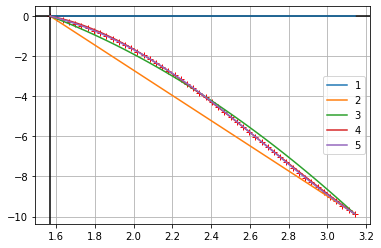

In [13]:
f = lambda x:x**2*np.cos(x)
x = np.linspace(np.pi/2,np.pi,50)

plt.plot(x,f(x),"r+")
plt.axhline(y = 0, color='k')
plt.axvline(x = np.pi/2, color='k')
plt.grid(True, which='both')
xs = np.linspace(1,5,100)

for m in range(1,6):
  grid = np.linspace(np.pi/2,np.pi,m)
  plt.plot(x,interpolacion(grid,x, f(grid)),label=str(m))
  

plt.legend()
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [14]:
# ... ENTER YOUR CODE HERE ...
def chebishev(a,b,m):
  k = np.array(range(m))
  x= np.cos(2*k+1/m)
  return (x+1)*(b-a)/2 + a

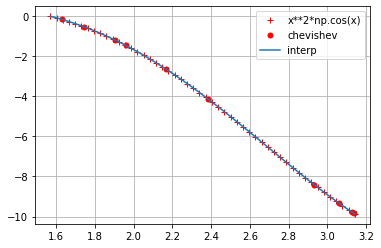

In [15]:
f = lambda x:x**2*np.cos(x)
x = np.linspace(np.pi/2,np.pi,50)
grid = chebishev(np.pi/2,np.pi,10)

plt.plot(x,f(x),"r+",label='x**2*np.cos(x)')
plt.plot(grid, f (grid),'r.',ms=10,label='chevishev')
plt.plot(x,interpolacion(grid,x,f(grid)),label='interp')
plt.grid(True, which='both')

plt.legend()
plt.show()